## Analysis of Financial Metrics

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df = pd.read_csv("fundamentals.csv")

In [3]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
df.tail()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2530000.0,4.0,-157361000.0,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9000000.0,54.0,-184000000.0,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7000000.0,44.0,-180000000.0,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-81000000.0,32.0,-224000000.0,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08
1780,1780,ZTS,2016-12-31,1.076000e+09,15000000.0,2000000.0,55.0,-216000000.0,1.024000e+09,65.0,...,3.390000e+09,1.117000e+09,1.487000e+09,6.162000e+09,7.649000e+09,4.888000e+09,-421000000.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [5]:
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [6]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis = 1)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,ZBH,2014-12-31,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,...,4.313300e+09,1.024000e+09,6.549900e+09,3.108100e+09,9.658000e+09,4.673300e+09,-6.183700e+09,2014.0,4.26,1.690845e+08
1772,ZBH,2015-12-31,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,...,5.862900e+09,1.617900e+09,9.887900e+09,1.733160e+10,2.721950e+10,5.997800e+09,-6.329100e+09,2015.0,0.78,1.884615e+08
1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.000000e+00,2013.0,1.01,4.990099e+08
1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.000000e+00,2014.0,1.16,5.025862e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1779
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1299 non-null   int64  
 1   Ticker Symbol                                        1299 non-null   object 
 2   Period Ending                                        1299 non-null   object 
 3   Accounts Payable                                     1299 non-null   float64
 4   Accounts Receivable                                  1299 non-null   float64
 5   Add'l income/expense items                           1299 non-null   float64
 6   After Tax ROE                                        1299 non-null   float64
 7   Capital Expenditures                                 1299 non-null   float64
 8   Capital Surplus                                      1299 non-null   floa

In [8]:
df.isnull().sum()

Unnamed: 0                      0
Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 79, dtype: int64

In [ ]:
df.describe(include='all')

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1299.000000,1299,1299,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1299.000000,...,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1299.000000,1.299000e+03
unique,NaN,360,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AAL,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,900.877598,NaN,NaN,3.709840e+09,-7.364829e+07,8.845911e+07,47.234796,-1.471495e+09,4.248825e+09,73.934565,...,8.085596e+09,5.637950e+09,9.537915e+09,1.712867e+10,2.666659e+10,2.134803e+10,-4.399277e+09,2013.219400,3.319923,5.807538e+08
std,507.943350,NaN,NaN,7.463106e+09,5.304388e+08,7.583589e+08,249.888806,3.380823e+09,8.643626e+09,100.580915,...,1.447895e+10,1.001800e+10,1.824904e+10,2.844549e+10,4.361829e+10,4.489432e+10,1.605909e+10,22.193998,5.016596,9.966520e+08
min,0.000000,NaN,NaN,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,481.000000,NaN,NaN,6.342590e+08,-1.010000e+08,-3.427000e+06,11.000000,-1.399000e+09,3.534500e+08,16.000000,...,1.814450e+09,1.085870e+09,2.076000e+09,3.311690e+09,6.165850e+09,4.123165e+09,-3.186500e+09,2013.000000,1.590000,1.437613e+08
50%,904.000000,NaN,NaN,1.388700e+09,-2.101900e+07,4.000000e+06,18.000000,-4.299870e+08,1.506000e+09,41.000000,...,3.494000e+09,2.357200e+09,4.307075e+09,7.848200e+09,1.294400e+10,8.205088e+09,-3.381500e+08,2014.000000,2.790000,2.855204e+08
75%,1339.500000,NaN,NaN,3.261234e+09,1.710000e+07,3.780000e+07,28.000000,-1.563680e+08,5.044000e+09,89.000000,...,7.832350e+09,5.356500e+09,9.816950e+09,1.864400e+10,3.098300e+10,1.749658e+10,0.000000e+00,2015.000000,4.500000,5.570089e+08


# 1. Data Exploration and Visualization:


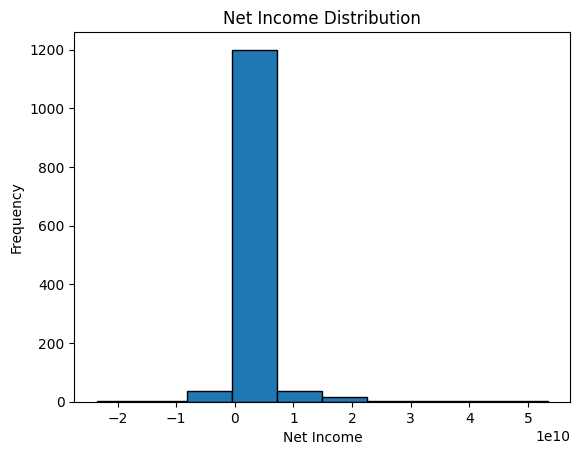

In [9]:
plt.hist(df['Net Income'], bins = 10, edgecolor='black')
plt.title('Net Income Distribution')
plt.xlabel('Net Income')
plt.ylabel('Frequency')
plt.show()

Histogram of net income distribution: display the net income and the frequency

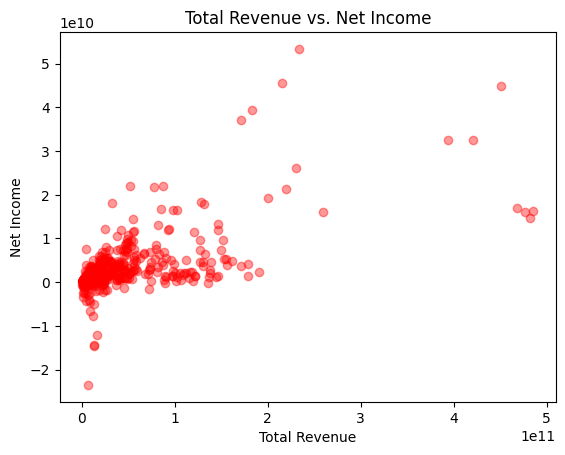

In [10]:
plt.scatter(df['Total Revenue'], df['Net Income'], alpha=0.4, color='red')
plt.title('Total Revenue vs. Net Income')
plt.xlabel('Total Revenue')
plt.ylabel('Net Income')
plt.show()

Scatter plot of total revenue vs net income:The graph shows a positive correlation between Total revenue and net income. This means that as companies total revenue increases, their net income also tends to increase. However, the correlation is not strong as there are companies with high revenue and low net income and vice versa. the graph also shows us the presence of some outliers.

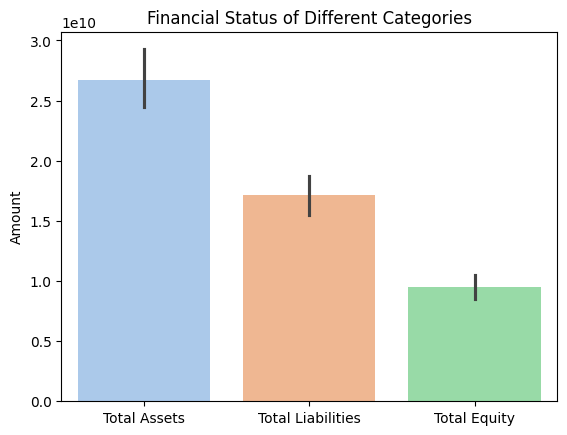

In [11]:
sns.barplot(data=df[['Total Assets', 'Total Liabilities', 'Total Equity']], palette='pastel')
plt.title('Financial Status of Different Categories')
plt.ylabel('Amount')
plt.show()

Error bar chart of the financial status of different categories: the amount of each financial category (total asset, total liability, and total equity), and the error bars on top of the bars indicate the variability or uncertainty in the measurements of these amounts. Total Assets is the largest category. The error bar charts for total assets and total liabilities are relatively small, suggesting low degree of uncertaininty in measuring these categories.

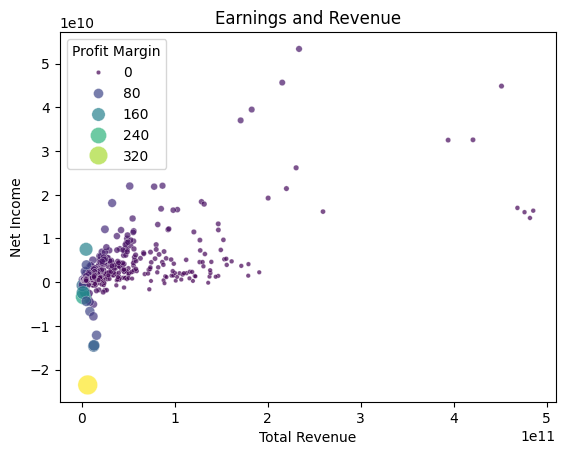

In [33]:
sns.scatterplot(x='Total Revenue', y='Net Income', hue='Profit Margin', data=df, palette='viridis', size='Profit Margin', sizes=(10, 200), alpha=0.7)
plt.title('Earnings and Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Net Income')
plt.legend(title='Profit Margin')
plt.show()

Sized and colored scatter plot of earning and revenue: the color and size based on the 'Profit Margin' The varying colors and sizes of points indicate different levels of profit margin. This is a comparison of how revenue correlates with net income and profit margin across different data points. There seems to be a positive correlation between revenue and net income. However the profit margins vary widely across all the data points.

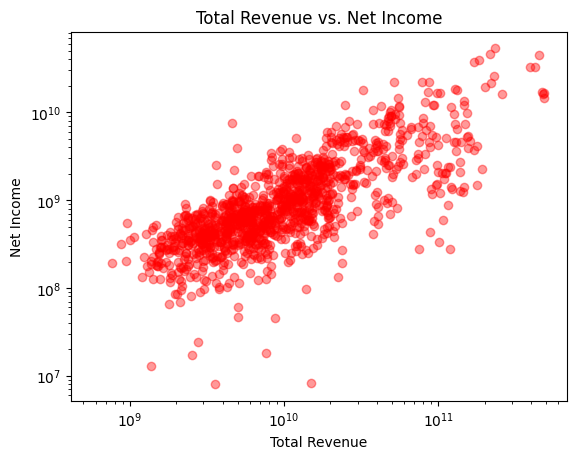

In [34]:
plt.scatter(df['Total Revenue'], df['Net Income'], alpha=0.4, color='red')
plt.yscale('log')
plt.xscale('log')
plt.title('Total Revenue vs. Net Income')
plt.xlabel('Total Revenue')
plt.ylabel('Net Income')
plt.show()

Total revenue Vs Net Income: The graph shows a positive correlation between Total revenue and Net Income. However, the scatter plot's points consistently fall below the diagonal line, indicating a gap between total revenue and net income

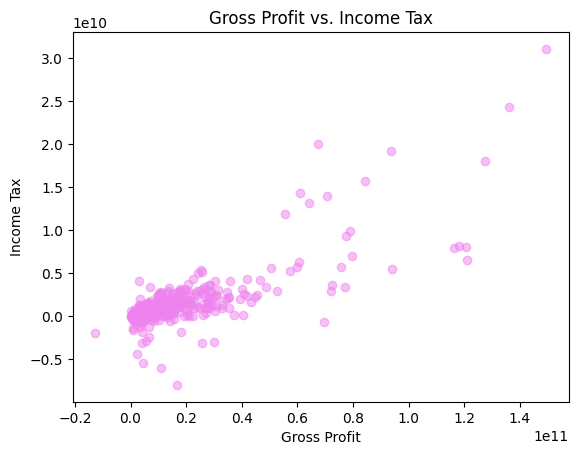

In [35]:
plt.scatter(df['Gross Profit'], df['Income Tax'], alpha=0.5, color='violet')
plt.title('Gross Profit vs. Income Tax')
plt.xlabel('Gross Profit')
plt.ylabel('Income Tax')
plt.show()

Gross Profit Vs Income tax: The scatter plot tells us that gross profit and income tax have a positive correlation and there might be some outliers.

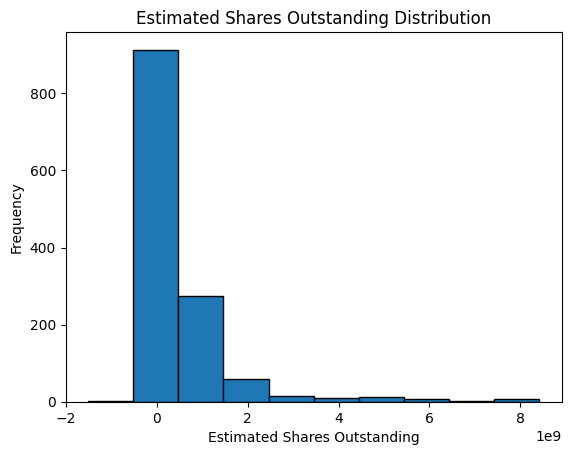

In [36]:
plt.hist(df['Estimated Shares Outstanding'], bins = 10, edgecolor='black')
plt.title('Estimated Shares Outstanding Distribution')
plt.xlabel('Estimated Shares Outstanding')
plt.ylabel('Frequency')
plt.show()

Estimated Shares Outstanding Distribution: Estimated Shares Outstanding is right skewed.

# 2. Linear Regression Model Development:

In [13]:
df_mod = df.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Estimated Shares Outstanding'], axis=1)

x = sm.add_constant(df_mod)
y = df['Estimated Shares Outstanding']

model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  19:58:31   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025   

# 3. Multicollinearity in Linear Regression:

In [14]:
print("Multicollinearity in a linear regression model refers to the presence of highly correlated independent variables. \n"
      "This can complicate the interpretation of the model's coefficients. When two variables are nearly identical, \n"
      "they don't offer unique or additional information to the model. This redundancy can lead to misleading results, \n"
      "such as inflated coefficients and high p-values, causing us to incorrectly assume that these variables are \n"
      "significant predictors.")


Multicollinearity in a linear regression model refers to the presence of highly correlated independent variables. 
This can complicate the interpretation of the model's coefficients. When two variables are nearly identical, 
they don't offer unique or additional information to the model. This redundancy can lead to misleading results, 
such as inflated coefficients and high p-values, causing us to incorrectly assume that these variables are 
significant predictors.


# 4. P-Value Analysis and Histogram:

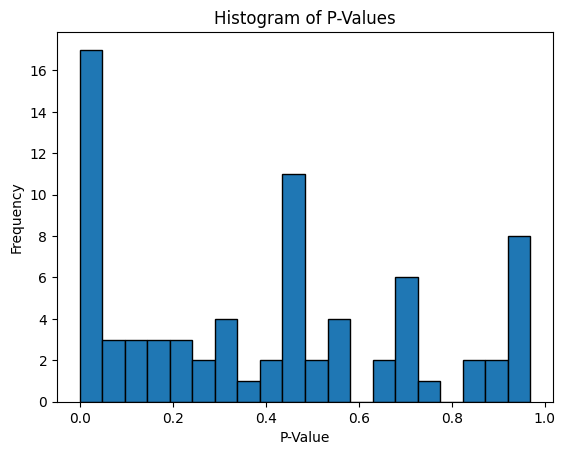

'First Peak (0-0.1):\nThis peak at low p-values (e.g., 0-0.1) suggests that there are variables in your regression model that are statistically significant. The lower the p-value, the stronger the evidence against the null hypothesis, indicating that these variables are likely to be important predictors.\nSecond Peak (Around 0.4):\nThe presence of a peak around 0.4 suggests another group of variables with higher p-values. These variables may not be statistically significant, indicating that there might be predictors in your model that do not have a significant impact on the dependent variable.\nThird Peak (Around 0.9):\nThe peak around 0.9 indicates a group of variables with very high p-values. This suggests that these variables are likely not statistically significant, and there is weak evidence against the null hypothesis for these predictors.\n\nPossible interpretations:\n\nMulticollinearity: The presence of multiple peaks may indicate multicollinearity, where some variables are hig

In [15]:
p_val = model.pvalues

plt.hist(p_val, bins=20, edgecolor='black')
plt.title('Histogram of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

'''First Peak (0-0.1):
This peak at low p-values (e.g., 0-0.1) suggests that there are variables in your regression model that are statistically significant. The lower the p-value, the stronger the evidence against the null hypothesis, indicating that these variables are likely to be important predictors.
Second Peak (Around 0.4):
The presence of a peak around 0.4 suggests another group of variables with higher p-values. These variables may not be statistically significant, indicating that there might be predictors in your model that do not have a significant impact on the dependent variable.
Third Peak (Around 0.9):
The peak around 0.9 indicates a group of variables with very high p-values. This suggests that these variables are likely not statistically significant, and there is weak evidence against the null hypothesis for these predictors.

Possible interpretations:

Multicollinearity: The presence of multiple peaks may indicate multicollinearity, where some variables are highly correlated with each other. This can lead to instability in estimating the coefficients and inflated p-values.

Overfitting: If your model includes too many predictors relative to the number of observations, it might fit the training data too closely, leading to overfitting. This can result in some variables appearing significant by chance.

Variable Selection: It might be worth revisiting your variable selection process.

Consider whether all variables included in the model are theoretically justified and whether there might be interaction effects or nonlinear relationships not captured.
To gain more insights, you may want to investigate the specific variables associated with each peak and consider refining your model based on domain knowledge and statistical considerations.
Additionally, checking for multicollinearity and considering variable transformations or interactions might help improve the model.'''

# 5. False Discovery Rate Control with BH Procedure


In [16]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)

  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N

  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()

    # Calculate the number of true discoveries
    true_discoveries = sorted_pvals[sorted_pvals <= alpha]
    num_true_discoveries = len(true_discoveries)
    return num_true_discoveries, alpha

Alpha: 0.001686631137968878


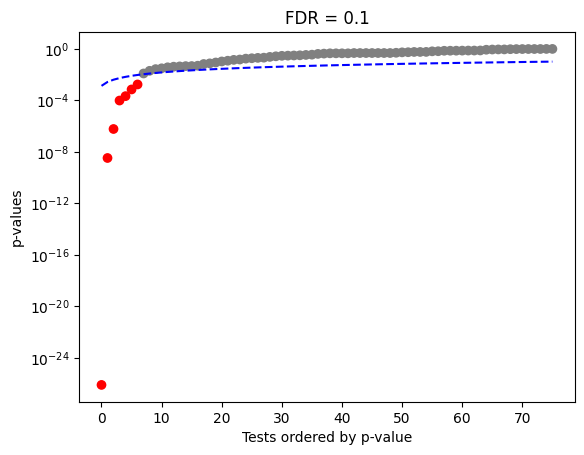

Number of true discovery: 7


In [17]:
num_true_discoveries, alpha = fdr(p_val, 0.1, plotit=True)
print(f"Number of true discovery: {num_true_discoveries}")

# 6. Sensitivity Analysis of FDR Control:

Alpha: 0.001686631137968878


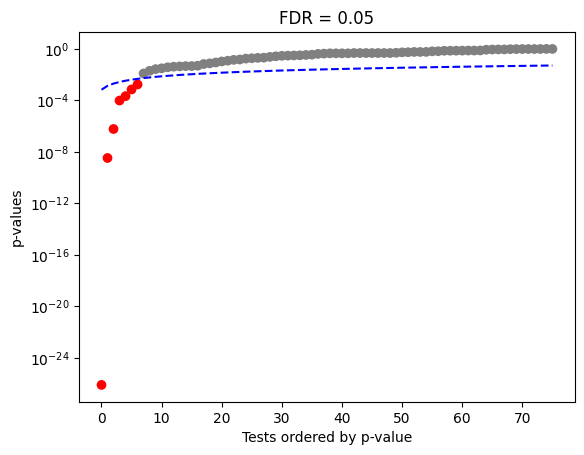

When q= 0.05 
The alpha is: 0.001686631137968878 
The estimated number of true discovery is: 7


In [18]:
num_true_discoveries1, alpha1 = fdr(p_val, 0.05, plotit=True)
print(f"When q= 0.05 \n"
      f"The alpha is: {alpha1} \n"
      f"The estimated number of true discovery is: {num_true_discoveries1}")

Alpha: 0.001686631137968878


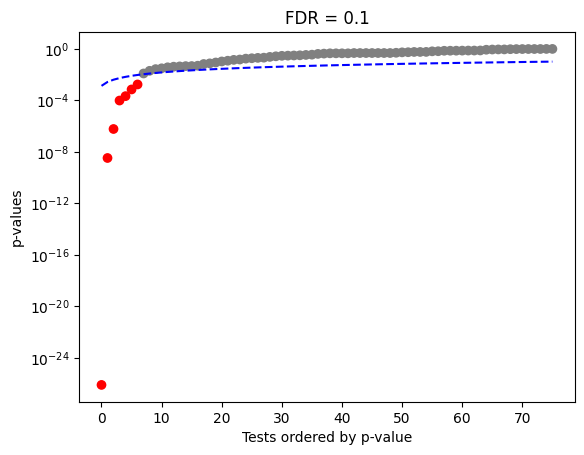

When q= 0.1 
The alpha is: 0.001686631137968878 
The estimated number of true discovery is: 7


In [19]:
num_true_discoveries2, alpha2 = fdr(p_val, 0.1, plotit=True)
print(f"When q= 0.1 \n"
      f"The alpha is: {alpha2} \n"
      f"The estimated number of true discovery is: {num_true_discoveries2}")

Alpha: 0.012009465640966785


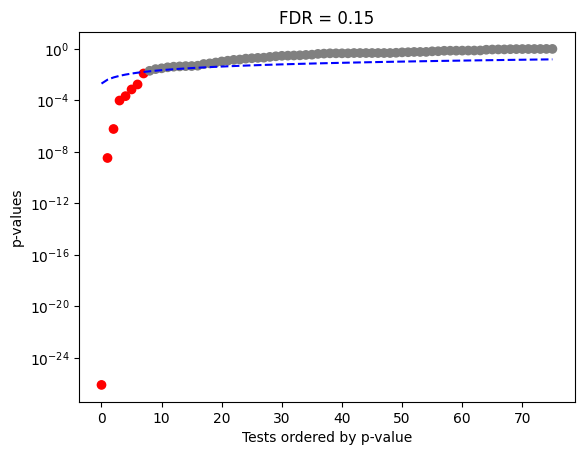

When q= 0.15 
The alpha is: 0.012009465640966785 
The estimated number of true discovery is: 8


In [23]:
num_true_discoveries3, alpha3 = fdr(p_val, 0.15, plotit=True)
print(f"When q= 0.15 \n"
      f"The alpha is: {alpha3} \n"
      f"The estimated number of true discovery is: {num_true_discoveries3}")

Alpha: 0.02623027781506562


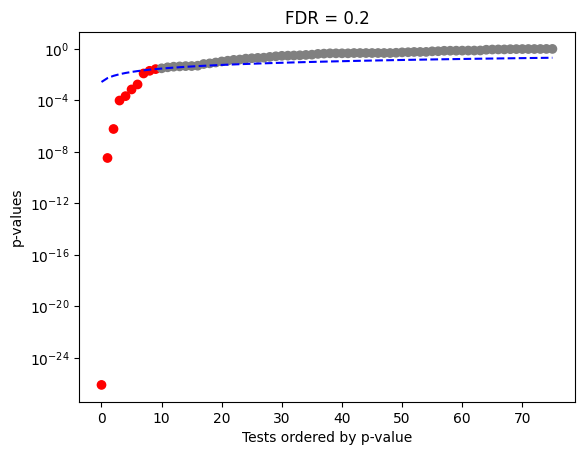

When q= 0.2 
The alpha is: 0.02623027781506562 
The estimated number of true discovery is: 10


In [20]:
num_true_discoveries4, alpha4 = fdr(p_val, 0.2, plotit=True)
print(f"When q= 0.2 \n"
      f"The alpha is: {alpha4} \n"
      f"The estimated number of true discovery is: {num_true_discoveries4}")

Alpha: 0.048268679676119246


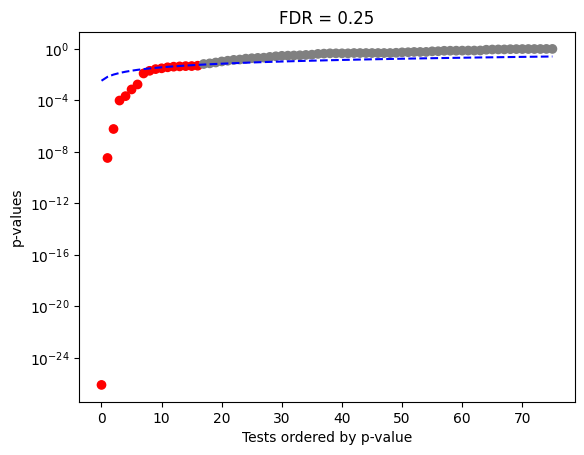

When q= 0.25 
The alpha is: 0.048268679676119246 
The estimated number of true discovery is: 17


In [21]:
num_true_discoveries5, alpha5 = fdr(p_val, 0.25, plotit=True)
print(f"When q= 0.25 \n"
      f"The alpha is: {alpha5} \n"
      f"The estimated number of true discovery is: {num_true_discoveries5}")

In [24]:
#Creating a dataframe of all the q value results
q_values = np.array([0.05,0.1,0.15,0.2,0.25])
Alpha_val = np.array([alpha1, alpha2, alpha3, alpha4, alpha5])
num_true_discoveries_val = np.array([num_true_discoveries1, num_true_discoveries2, num_true_discoveries3, num_true_discoveries4, num_true_discoveries5])
col_names = ['q value', 'Alpha', 'Number of True Discoveries']
q6_df = pd.DataFrame({col_names[0] : q_values, col_names[1] : Alpha_val, col_names[2] : num_true_discoveries_val})
print(q6_df)

   q value     Alpha  Number of True Discoveries
0     0.05  0.001687                           7
1     0.10  0.001687                           7
2     0.15  0.012009                           8
3     0.20  0.026230                          10
4     0.25  0.048269                          17


The number of true discoveries increases steadily when q is in the range of 0.05 - 0.10. As the q value increases to 0.2 we see a drastic increse in the num of true discovery values. Increasing the q value generates a robust and a steady result unless it is increased beyond 0.15.

# 7. Exploring Interaction Terms

## Expand linear regression model by adding interaction terms

In [25]:
# List of variables of interest
variables_of_interest = [
    'Accounts Payable',
    'Accounts Receivable',
    'Add\'l income/expense items',
    'After Tax ROE',
    'Capital Expenditures',
    'Capital Surplus',
    'Cash Ratio',
    'Cash and Cash Equivalents',
    'Changes in Inventories',
    'Common Stocks',
    'Cost of Revenue',
    'Current Ratio',
    'Deferred Asset Charges',
    'Deferred Liability Charges',
    'Depreciation',
    'Earnings Before Interest and Tax',
    'Earnings Before Tax',
    'Effect of Exchange Rate',
    'Equity Earnings/Loss Unconsolidated Subsidiary',
    'Fixed Assets',
    'Goodwill',
    'Gross Margin',
    'Gross Profit',
    'Income Tax',
    'Intangible Assets'
]

# Filter the dataframe to include only the variables of interest
selected_df = df[variables_of_interest]

selected_df.head()


,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5.496000e+09,4.616000e+09,0.0,0.0,2.751000e+10,4.091000e+09,73.0,2.989400e+10,-2.994000e+09,2.249000e+09
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,6.579150e+08,6.240740e+08,0.0,0.0,1.292547e+09,7.638900e+07,50.0,3.098036e+09,2.364040e+08,2.884500e+07


In [27]:
#  degree=2 for interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit and transform the data to create the interaction terms
interaction = poly.fit_transform(selected_df)


# Get feature names for the columns from PolynomialFeatures
interaction_feature_names = poly.get_feature_names_out(selected_df.columns)

# Convert the interaction terms back to a DataFrame
interaction_df = pd.DataFrame(interaction, columns=interaction_feature_names)
interaction_df


,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Gross Margin^2,Gross Margin Gross Profit,Gross Margin Income Tax,Gross Margin Intangible Assets,Gross Profit^2,Gross Profit Income Tax,Gross Profit Intangible Assets,Income Tax^2,Income Tax Intangible Assets,Intangible Assets^2
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,3364.0,8.326480e+11,-3.300200e+10,5.040200e+10,2.060947e+20,-8.168564e+18,1.247536e+19,3.237610e+17,-4.944610e+17,7.551610e+17
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,3481.0,9.277160e+11,-2.041400e+10,1.363490e+11,2.472442e+20,-5.440504e+18,3.633816e+19,1.197160e+17,-7.996060e+17,5.340721e+18
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,3969.0,1.702890e+12,2.079000e+10,1.411200e+11,7.306209e+20,8.919900e+18,6.054720e+19,1.089000e+17,7.392000e+17,5.017600e+18
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5329.0,2.182262e+12,-2.185620e+11,1.641770e+11,8.936512e+20,-8.950264e+19,6.723161e+19,8.964036e+18,-6.733506e+18,5.058001e+18
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,2500.0,1.549018e+11,1.182020e+10,1.442250e+09,9.597827e+18,7.323881e+17,8.936285e+16,5.588685e+16,6.819073e+15,8.320340e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,2700000.0,...,5329.0,2.504265e+11,1.607460e+10,4.405550e+10,1.176833e+19,7.553961e+17,2.070307e+18,4.848804e+16,1.328907e+17,3.642122e+17
1295,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,3000000.0,...,4900.0,2.938040e+11,4.900000e+08,6.122410e+11,1.761649e+19,2.938040e+16,3.670997e+19,4.900000e+13,6.122410e+16,7.649776e+19
1296,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5000000.0,...,3969.0,1.821960e+11,1.178100e+10,5.058900e+10,8.363664e+18,5.408040e+17,2.322276e+18,3.496900e+16,1.501610e+17,6.448090e+17
1297,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5000000.0,...,4096.0,1.963520e+11,1.491200e+10,4.652800e+10,9.412624e+18,7.148440e+17,2.230436e+18,5.428900e+16,1.693910e+17,5.285290e+17


In [28]:
import statsmodels.api as sm
x = sm.add_constant(interaction_df.reset_index(drop=True))
y = df['Estimated Shares Outstanding'].reset_index(drop=True)

interaction_model = sm.OLS(list(y), x).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.59
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:59:57   Log-Likelihood:                -26886.
No. Observations:                1299   AIC:                         5.440e+04
Df Residuals:                     983   BIC:                         5.604e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## Why interaction terms might be important in the context of predicting estimated shares outstanding

In [29]:
print("Interaction terms are important in regression models, particularly when predicting complex outcomes \n"
      "such as Estimated Shares Outstanding using fundamental financial metrics. Financial relationships \n"
      "are not always linear or additive, and variables alone does not often influence outcomes independently. \n"
      "When including the interaction terms, it allows us to understand the combined effects of two variables on \n"
      "the shares outstanding, thereby improving the model’s predictive performance and giving more accurate insights")


Interaction terms are important in regression models, particularly when predicting complex outcomes 
such as Estimated Shares Outstanding using fundamental financial metrics. Financial relationships 
are not always linear or additive, and variables alone does not often influence outcomes independently. 
When including the interaction terms, it allows us to understand the combined effects of two variables on 
the shares outstanding, thereby improving the model’s predictive performance and giving more accurate insights


# 8. Model Evaluation with Interaction Terms:

## Evaluate the performance of this new model with interaction terms

In the original model without interactions
* R-sqaured: 0.854
* Ajusted R-squared: 0.845
* F-statistic: 98.40
* AIC: 55161.46
* BIC: 55543.99

In the new model with interactions
* R-sqaured: 0.94
* Ajusted R-squared: 0.92
* F-statistic: 52.58
* AIC: 54404.04
* BIC: 56037.56



## Significant changes in the model's performance

Looking at the Adjusted R-squared, we observe that the new model with interaction terms the adjusted R-squared is 0.926, this demonstrates a better fit than the original model without interaction terms (adjusted R-squared = 0.846). This increase in adjusted R-squared indicates that by adding the interaction terms it explains a greater portion of the variance than the original model.

Looking at the F-statistics, the new model with interaction terms has a lower F-statistic (F-stat = 52.58) compared to the original model without interaction (F-stat = 98.4). This decrease might suggest that some of the interaction terms are not significantly contributing to the model, thereby diminishing the overall F-statistic.

Looking at the AIC and BIC values both metrics are lower for the new model with interaction than for the original model without interaction. Lower values in AIC and BIC generally imply a more efficient model, indicating that, despite the lower F-statistic, the new model with interaction terms might still be more effective overall.

# 9. FDR Analysis with Interaction Terms:

## Create a histogram of the p-values for the new model including interaction terms

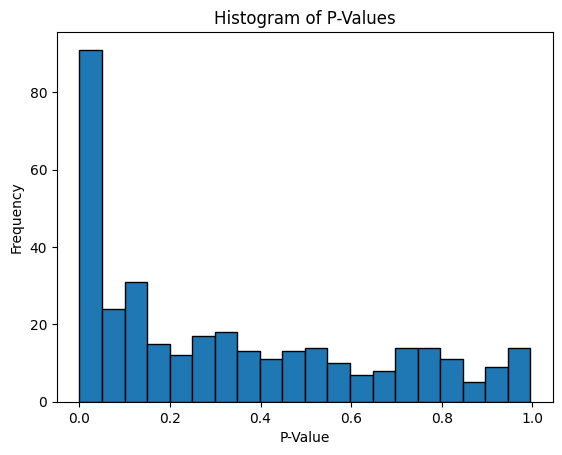

In [30]:
# histogram of p-values
interaction_p_val = interaction_model.pvalues
plt.hist(interaction_p_val, bins=20, edgecolor='black')
plt.title('Histogram of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

In the histogram of the new model with interactions shows large number of p values near 0. This indicates that there are many predictors (main and  interaction terms) are statistically significan, suggesting that including interaction terms captures more significant relationships and that it fits the model better.

## Apply the BH procedure to control the False Discovery Rate with a q-value of 0.1

Alpha: 0.019215188601502925


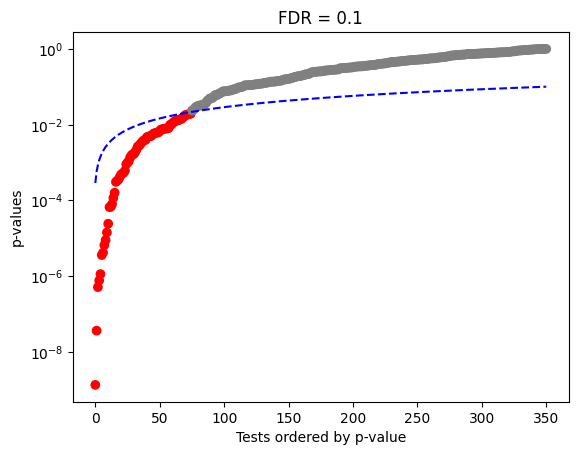

When q= 0.1 
The alpha is: 0.019215188601502925 
The estimated number of true discoveries is: 75


In [32]:
# when q = 0.1
num_true_discoveries1, alpha1 = fdr(interaction_p_val, 0.10, plotit=True)
print(f"When q= 0.1 \n"
      f"The alpha is: {alpha1} \n"
      f"The estimated number of true discoveries is: {num_true_discoveries1}")

## Compare these results with those obtained from the original model


Original Model without Interaction when q=0.1
* Alpha: 0.016
* Estimated number of true discoveries: 7

New Model with Interaction when q=0.1
* Alpha: 0.019
* Estimated number of true discoveries: 75

Impact of including interaction terms
* The model with interaction terms results in a large increase in the number of discoveries compared to the original model. This suggests that the interaction terms are capturing additional significant relationships between the variables that were not detected by the original model

* Both models have similar alpha values, showing that the threshold for a statistically significant result is roughly the same. However, when we include the interaction terms, it led to a greater proportion of tests being considered significant while still controlling the FDR at the same level.

